In [1]:
import os
import numpy as np
import xarray as xr;xr.set_options(display_style='text') 

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
import matplotlib
matplotlib.rcParams.update({'font.size':15})

import cartopy.crs as ccrs
import cartopy

import sys
p = os.path.abspath('/global/homes/q/qnicolas/')
if p not in sys.path:
    sys.path.append(p)

from orographicPrecipitation.observationsAndERA5.mountainUtils import *

import warnings

In [2]:
Ghats      = MountainRangeCustom("ghats"      ,[64,82,7,24]   ,"Western Ghats"           ,70 ,[6,7,8]  ,[ 75  ,   9  ,  71.5, 20   ,2  ], path= '/global/cscratch1/sd/qnicolas/regionsDataDeep/')
Ghats.set_daily_imerg()
Ghats.set_daily_Bl_vars('deep')

In [3]:
topo_midres = xr.open_dataarray("/global/cscratch1/sd/qnicolas/ETOPO1_Ice_g_gmt4_coarse.nc")

In [4]:
def get_binned(a,b,bins):
    a,b = np.array(a).reshape(-1),np.array(b).reshape(-1)
    idx = ~np.isnan(b)
    a = a[idx]
    b = b[idx]
    
    idx_bin_inf = max(0,np.argmax(bins>float(a.min()))-1)
    idx_bin_sup = np.argmin(bins<float(a.max()))
    if idx_bin_sup==0 or idx_bin_sup==len(bins)-1:
        bins=bins[idx_bin_inf:]
    else:
        bins=bins[idx_bin_inf:idx_bin_sup+1]
    bin_centers=(bins[1:]+bins[:-1])/2
    digitized = np.digitize(np.array(a), bins)
    bin_means = np.array([np.array(b)[digitized == i].mean() for i in range(1, len(bins))])
    return bin_centers,bin_means

def add_latlon(ax,box,ftz=None):
    ax.set_anchor('W')
    dl=5
    lons=range(dl*(1+(int(box[0])-1)//dl),dl*(int(box[1])//dl)+1,dl)
    lats=range(dl*(1+(int(box[2])-1)//dl),dl*(int(box[3])//dl)+1,dl)
    
    ax.set_xticks(lons)
    ax.set_xticklabels(lons)
    ax.set_yticks(lats)
    ax.set_yticklabels(lats)
    
    ax.set_xlabel("")
    ax.set_ylabel("")
        

# Map

Text(0.5, 1.0, 'Ghats Jun-Aug 2001-2020 IMERG rainfall')

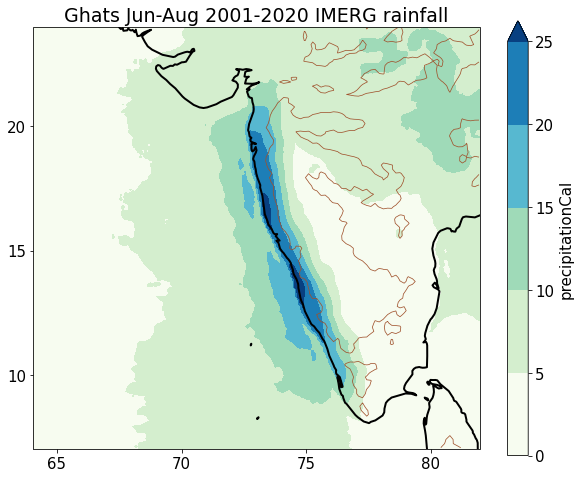

In [6]:
_,ax = plt.subplots(1,1,figsize=(10,8),subplot_kw={'projection':ccrs.PlateCarree()})

ax.coastlines(linewidth=2.)
    
Ghats.vars['GPM_PR_DAILY'].mean('time').transpose('latitude','longitude').plot.contourf(ax=ax,transform=ccrs.PlateCarree(),levels=np.arange(0.,26.,5.),cmap=plt.cm.GnBu)
sel_box(topo_midres,Ghats.box).plot.contour(ax=ax,transform=ccrs.PlateCarree(),levels=[500.],linewidths=[0.75],colors=['sienna'])
        
add_latlon(ax,Ghats.box,ftz=14)
ax.set_title('Ghats Jun-Aug 2001-2020 IMERG rainfall',fontsize=19)

# P-BL relationship, daily, by month

In [7]:
precip_all = Ghats.vars['GPM_PR_DAILY'].transpose('time','latitude','longitude').interp_like(Ghats.vars['BLDEEP_DAILY'])
bl_all = Ghats.vars['BLDEEP_DAILY']

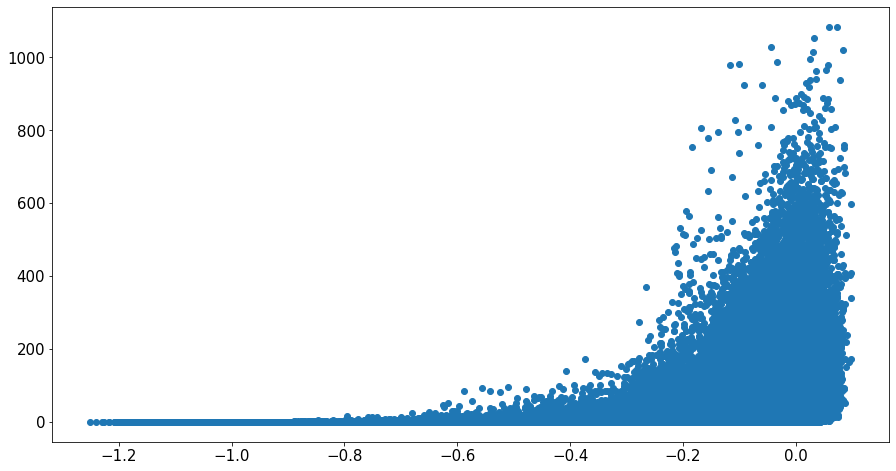

In [8]:
_,ax=plt.subplots(1,1,figsize=(15,8))
ax.scatter(bl_all,precip_all)

In [9]:
bl_bins = np.linspace(-1.2,0.3,201)

In [10]:
def sel_month(ds,month):
    return ds.sel(time=(ds['time.month']==month))

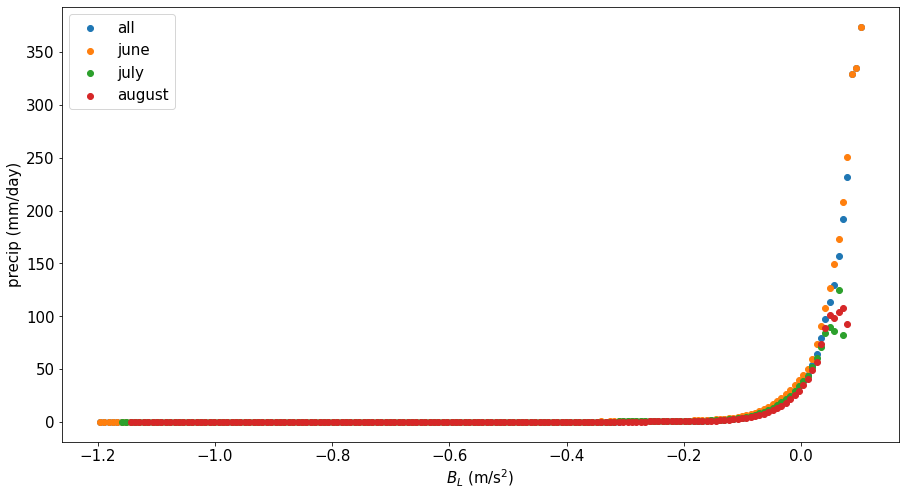

In [11]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore', RuntimeWarning)
    _,ax=plt.subplots(1,1,figsize=(15,8))
    ax.scatter(*get_binned(bl_all,precip_all,bl_bins),label='all')
    ax.scatter(*get_binned(sel_month(bl_all,6),sel_month(precip_all,6),bl_bins),label='june')
    ax.scatter(*get_binned(sel_month(bl_all,7),sel_month(precip_all,7),bl_bins),label='july')
    ax.scatter(*get_binned(sel_month(bl_all,8),sel_month(precip_all,8),bl_bins),label='august')
    ax.legend()
    ax.set_ylabel('precip (mm/day)')
    ax.set_xlabel(r'$B_L$ (m/s$^2$)')

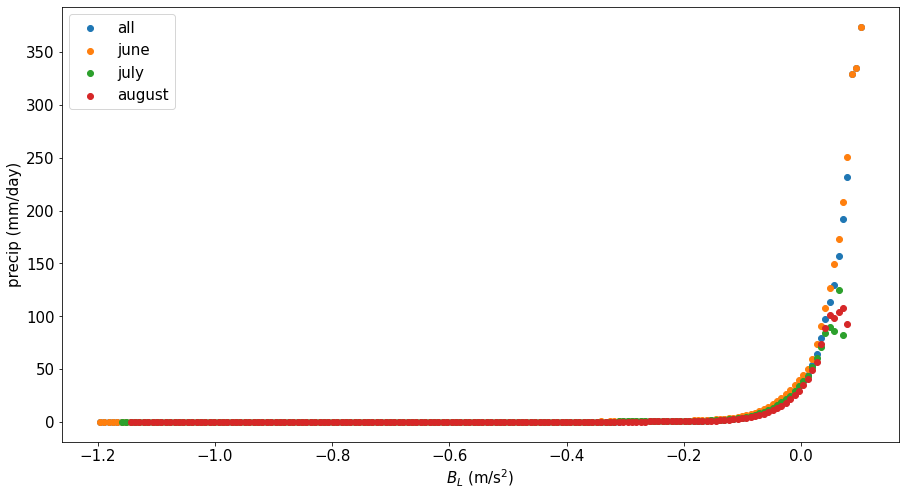

In [12]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore', RuntimeWarning)
    _,ax=plt.subplots(1,1,figsize=(15,8))
    ax.scatter(*get_binned(bl_all,precip_all,bl_bins),label='all')
    ax.scatter(*get_binned(sel_month(bl_all,6),sel_month(precip_all,6),bl_bins),label='june')
    ax.scatter(*get_binned(sel_month(bl_all,7),sel_month(precip_all,7),bl_bins),label='july')
    ax.scatter(*get_binned(sel_month(bl_all,8),sel_month(precip_all,8),bl_bins),label='august')
    ax.legend()
    ax.set_ylabel('precip (mm/day)')
    ax.set_xlabel(r'$B_L$ (m/s$^2$)')